In [1]:
from newscrawl.newscrawl import MongoDB
import pandas as pd

naver_col = MongoDB.conn_mongodb('naver')
daum_col = MongoDB.conn_mongodb('daum')

In [2]:
naver_cursor = naver_col.find()
daum_cursor = daum_col.find()
naver_cursor

In [3]:
naver_df =  pd.DataFrame(list(naver_cursor))
daum_df = pd.DataFrame(list(daum_cursor))

In [4]:
naver_df.head()

,_id,press,title,section,keywords,crawl_time
0,60d44e703bd7c67757f3ad2d,KBS,이주열 “연내 적절한 시점부터 통화정책 정상화”,headline,"[이주열, 연내, 시점, 통화정책, 정상화]",2021-06-24 18:20:48.794
1,60d44e703bd7c67757f3ad2e,헤럴드경제,우주선도 아니고 풍선인데…6시간 우주여행에 1억4천만원,it,"[우주선, 풍선, 우주여행]",2021-06-24 18:20:48.869
2,60d44e703bd7c67757f3ad2f,블로터,삼성전자의 WOLED 채택 가능성 '솔솔'...LG디스플레이엔 ‘기회’,it,"[전자, WOLED, 채택, 가능성, 솔솔, LG, 디스플레이, 기회]",2021-06-24 18:20:48.945
3,60d44e703bd7c67757f3ad30,머니투데이,"'동료 잃은 슬픔' 한 달…길어지는 네이버 조사, 결론은?",it,"[동료, 슬픔, 달, 네이버, 조사, 결론]",2021-06-24 18:20:48.954
4,60d44e713bd7c67757f3ad31,연합뉴스,"""1평 전화부스서 일·식사해라""…크래프톤도 '직장 괴롭힘' 발생(종합)",it,"[평, 전화, 부스, 일, 식사, 크래프톤, 직장, 괴롭힘, 발생, 종합]",2021-06-24 18:20:49.037


In [5]:
daum_df.head()

,_id,press,title,section,keywords,crawl_time
0,60d44e6f3bd7c67757f3ad0a,한겨레,"헌재, 윤석열 낸 검사징계법 헌법소원 '각하'..""직접성 없어""",society,"[헌재, 윤석열, 검사, 징계, 법, 헌법소원, 각하, 직접]",2021-06-24 18:20:47.839
1,60d44e6f3bd7c67757f3ad0b,뉴시스,"신세계, 3.4조에 이베이코리아 인수..e커머스 2위로 도약(종합)",economy,"[신세계, 에, 이베이, 코리아, 인수, e, 커머스, 위로, 도약, 종합]",2021-06-24 18:20:47.895
2,60d44e6f3bd7c67757f3ad0c,뉴시스,"김종인 ""윤석열 석 달간 잡음 일으켜"" 실망",politics,"[김종인, 윤석열, 석, 달, 잡음, 실망]",2021-06-24 18:20:47.908
3,60d44e6f3bd7c67757f3ad0d,머니투데이,"""안타까워 거둬준 20대 의붓아들, 10살 친딸 수개월 성폭행""",society,"[준, 의붓아들, 살, 친딸, 개월, 성폭행]",2021-06-24 18:20:47.921
4,60d44e6f3bd7c67757f3ad0e,연합뉴스,"문대통령, 유공자·보훈가족 靑초청..""국빈 맞는 마음""(종합)",politics,"[대통령, 유공, 보훈, 가족, 靑, 초청, 국빈, 마음, 종합]",2021-06-24 18:20:47.929


In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
import re
import collections

font_path = '/home/keyog/coding/main-news-analys/BMDOHYEON.ttf'

naver_keywords_str = ''
for keyword in naver_df['keywords'] :
    naver_keywords_str += ' '.join(keyword)

daum_keywords_str = ''
for keyword in daum_df['keywords'] :
    daum_keywords_str += ' '.join(keyword)
    
spwords = set(STOPWORDS)
wc = WordCloud(max_font_size = 200,
               stopwords = spwords,
               font_path = font_path,
               background_color = 'white',
               width = 800, height = 800)

wc.generate(naver_keywords_str+' '+daum_keywords_str)

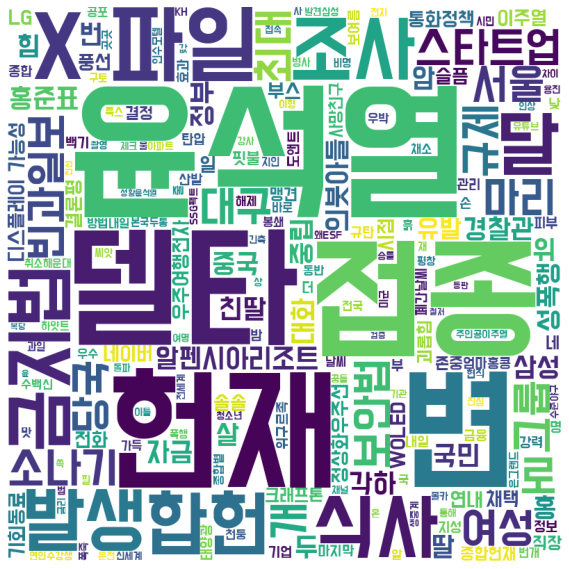

In [7]:
plt.figure(figsize=(10, 8))
plt.imshow(wc)
plt.tight_layout(pad=0)
plt.axis('off')
plt.show()

In [9]:
naver_df['press'].value_counts().index

Index(['연합뉴스', '뉴스1', '서울신문', '서울경제', '한국경제', 'KBS', '중앙일보', 'MBN', '세계일보',
       '블로터', '데일리안', '경향신문', '더팩트', '국민일보', 'SBS Biz', '한국경제TV', '파이낸셜뉴스',
       '이데일리', 'SBS', '머니투데이', '헬스조선', '헤럴드경제'],
      dtype='object')

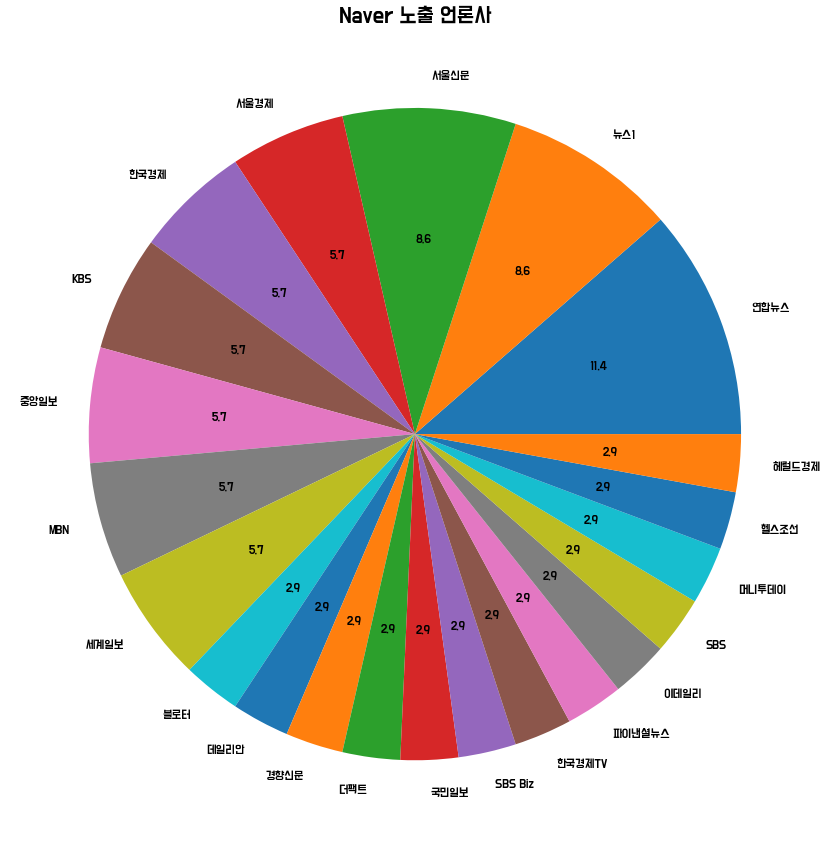

In [18]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.title('Naver 노출 언론사',fontproperties=fontprop)
plt.pie(naver_df['press'].value_counts(),autopct="%.1f",labels=naver_df['press'].value_counts().index)
plt.show()

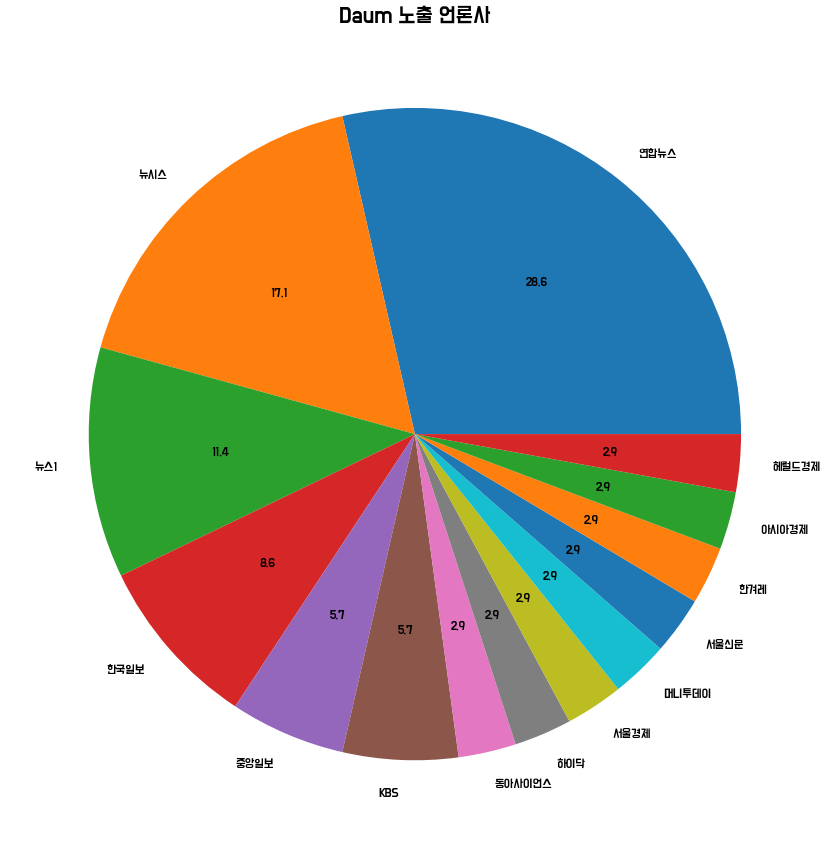

In [20]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.title('Daum 노출 언론사',fontproperties=fontprop)
plt.pie(daum_df['press'].value_counts(),autopct="%.1f",labels=daum_df['press'].value_counts().index)
plt.show()

In [23]:
naver_daum_df = pd.concat([naver_df,daum_df])

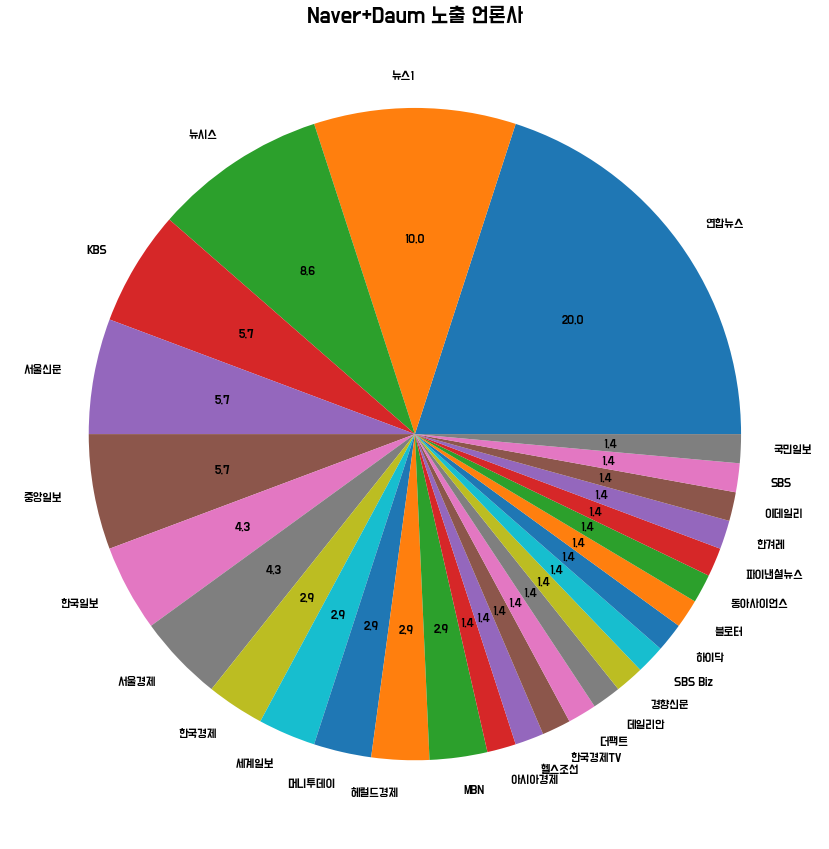

In [25]:
%matplotlib inline
plt.figure(figsize=(15,15))
plt.title('Naver+Daum 노출 언론사',fontproperties=fontprop)
plt.pie(naver_daum_df['press'].value_counts(),autopct="%.1f",labels=naver_daum_df['press'].value_counts().index)
plt.show()